**Learn Data Science @ Slidescope **

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt


TensorFlow helps data scientists and engineers train machine learning models more efficiently.

A high-level API that simplifies TensorFlow's use, making it easier to build and experiment with models. It's designed for quick development cycles and experimentation, and is perfect for rapid prototyping.

In [17]:
# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [18]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


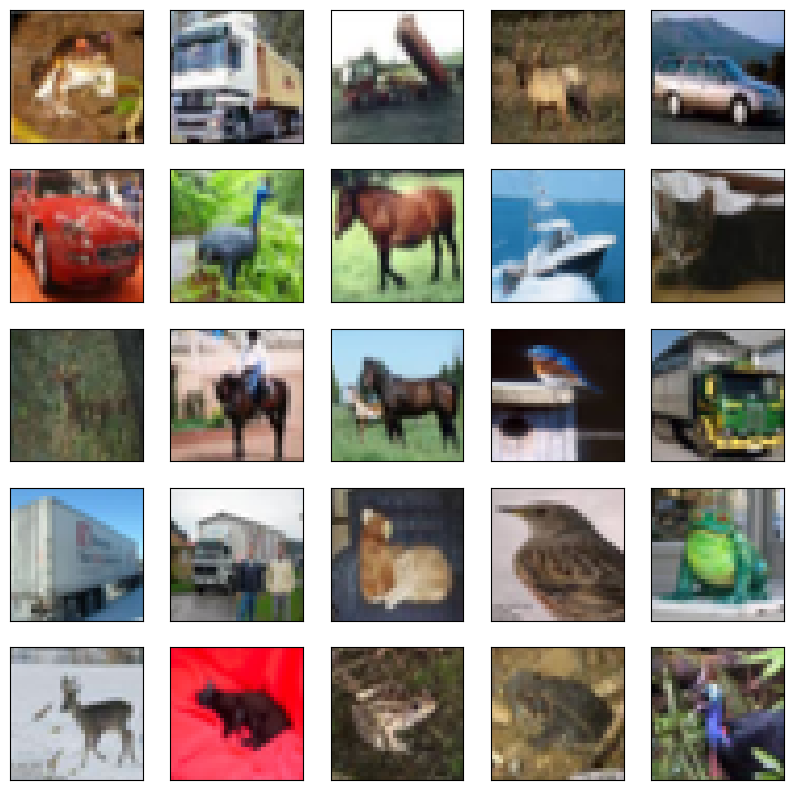

In [8]:
import numpy as np

# CIFAR-10 Class Labels
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Plot some images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])

plt.show()


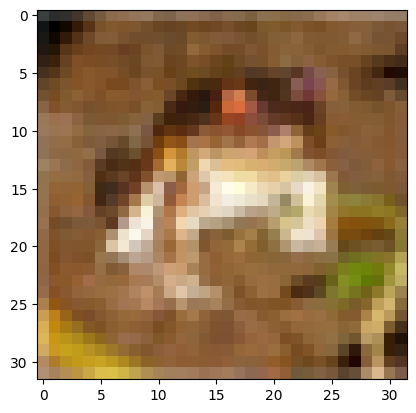

In [12]:
plt.imshow(x_train[0])

plt.show()

In [11]:
x_train[49876]

array([[[0.09019608, 0.3372549 , 0.5882353 ],
        [0.09019608, 0.34509805, 0.6039216 ],
        [0.09411765, 0.3529412 , 0.61960787],
        ...,
        [0.10196079, 0.3372549 , 0.5803922 ],
        [0.10196079, 0.32941177, 0.57254905],
        [0.10980392, 0.32941177, 0.56078434]],

       [[0.08235294, 0.34117648, 0.6039216 ],
        [0.08627451, 0.34901962, 0.6156863 ],
        [0.09019608, 0.36078432, 0.6313726 ],
        ...,
        [0.10588235, 0.3529412 , 0.60784316],
        [0.10196079, 0.34509805, 0.5882353 ],
        [0.10588235, 0.34117648, 0.5803922 ]],

       [[0.09019608, 0.34509805, 0.6117647 ],
        [0.09019608, 0.3529412 , 0.61960787],
        [0.09411765, 0.3647059 , 0.6392157 ],
        ...,
        [0.1254902 , 0.39607844, 0.6509804 ],
        [0.12156863, 0.38431373, 0.6313726 ],
        [0.11764706, 0.37254903, 0.6117647 ]],

       ...,

       [[0.3529412 , 0.67058825, 0.9254902 ],
        [0.36078432, 0.6784314 , 0.9098039 ],
        [0.3137255 , 0

In [23]:
# Update last Dense layer for 100 classes
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 100 classes for CIFAR-100 10 for CIFAR - 10
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
#compile the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 89ms/step - accuracy: 0.3213 - loss: 1.8249 - val_accuracy: 0.4891 - val_loss: 1.4111
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.5342 - loss: 1.3065 - val_accuracy: 0.5923 - val_loss: 1.1477
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.6046 - loss: 1.1235 - val_accuracy: 0.6218 - val_loss: 1.0741
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.6448 - loss: 1.0175 - val_accuracy: 0.6230 - val_loss: 1.0662
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.6725 - loss: 0.9399 - val_accuracy: 0.6677 - val_loss: 0.9517
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.6976 - loss: 0.8697 - val_accuracy: 0.6866 - val_loss: 0.8997
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.7110 - loss: 0.8213 - val_accuracy: 0.6933 - val_loss: 0.8850
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.7334 - loss: 0.7678 - 

In [27]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 4s - 11ms/step - accuracy: 0.7018 - loss: 0.8632
Test accuracy: 0.7017999887466431


In [28]:
predictions = model.predict(x_test)
print(predictions)  # Output: Array of probabilities for each class

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
[[2.92783533e-03 7.30515283e-04 7.82324187e-03 ... 1.85341225e-04
  9.63748805e-03 9.19236802e-04]
 [3.73376906e-02 5.52062690e-01 1.04473893e-05 ... 4.72806398e-08
  3.85533631e-01 2.50446275e-02]
 [1.23470575e-01 2.61713535e-01 9.22304229e-04 ... 1.26823364e-03
  5.13112307e-01 9.23065916e-02]
 ...
 [2.47554184e-04 2.93902594e-05 5.39445937e-01 ... 1.33918524e-01
  1.16115252e-05 2.83381014e-05]
 [2.65271574e-01 7.70981908e-02 9.02731344e-03 ... 2.87040696e-02
  7.18960015e-04 3.54508101e-03]
 [1.09519090e-06 4.08567296e-08 2.39625442e-04 ... 9.47674215e-01
  1.11039080e-08 9.52491632e-07]]


In [29]:
# predictions will be a numpy array where each element is a vector of probabilities for each of the 10 classes (CIFAR-10).
# You can find the predicted class by taking the argmax of the predictions.

In [30]:
predicted_classes = np.argmax(predictions, axis=1)

In [36]:
len(predicted_classes)

10000

In [31]:
# Optional - Visualize Training History

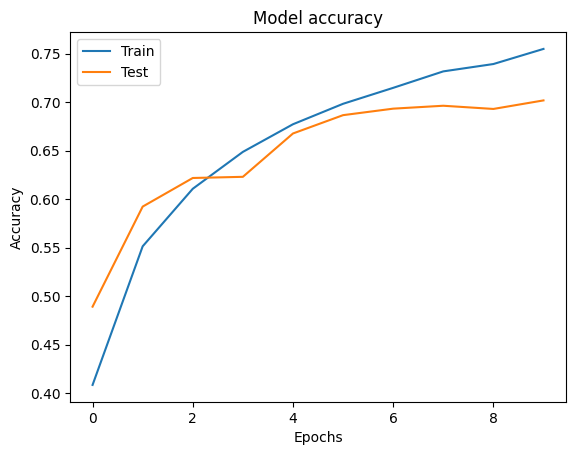

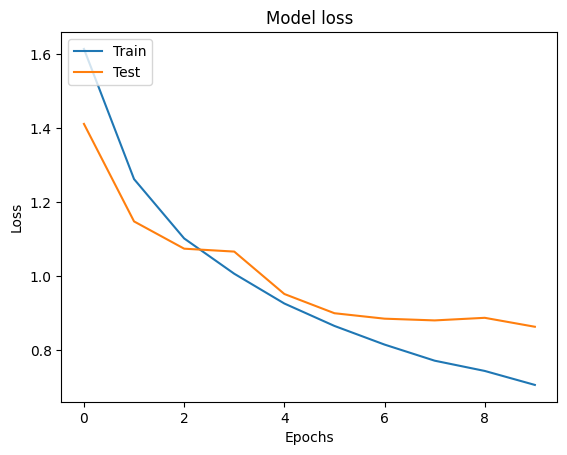

In [32]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [33]:
# This helps in understanding how the model is learning and if it's overfitting (i.e., high training accuracy but low validation accuracy).

    This will save the entire model (architecture, weights, and optimizer state) to a file named cifar100_model.h5.

Summary of the Steps

    Compile the model: Set up the optimizer, loss function, and evaluation metric.
    Train the model: Use fit() to train the model on the training data.
    Evaluate the model: Assess the model's performance on the test data using evaluate().
    Make predictions: Use predict() to classify new data.
    Visualize performance: Plot training/validation loss and accuracy.
    Save the model: Save the trained model for later use.

In [34]:
# Save the model to use later

model.save('cifar100_model.h5')

In [42]:
# prompt: /content/Screenshot 2024-12-10 000153.png covert this into 32x32 array

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load and preprocess the image
img = Image.open('/content/Screenshot 2024-12-10 000153.png')
img = img.resize((32, 32))  # Resize to 32x32
img_array = np.array(img)

# Normalize pixel values (if needed, depending on your model)
img_array = img_array.astype('float32') / 255.0

# Check if the image has 3 color channels (RGB)
if img_array.shape[2] == 4: #Check if image has an alpha channel.
    img_array = img_array[:,:,:3] #Discard the alpha channel
elif len(img_array.shape) == 2: #Check if image is grayscale.
    img_array = np.stack((img_array,)*3, axis=-1) #Duplicate the image across the 3 channels

thearray = img_array
# Reshape to (1, 32, 32, 3) for model input if needed.
img_array = np.expand_dims(img_array, axis=0)

print(img_array.shape)
img_array

(1, 32, 32, 3)


array([[[[0.79607844, 0.75686276, 0.7294118 ],
         [0.79607844, 0.7607843 , 0.7294118 ],
         [0.79607844, 0.7607843 , 0.73333335],
         ...,
         [0.8352941 , 0.7882353 , 0.7647059 ],
         [0.8392157 , 0.7921569 , 0.7647059 ],
         [0.8392157 , 0.7921569 , 0.7647059 ]],

        [[0.8       , 0.7647059 , 0.73333335],
         [0.8039216 , 0.7647059 , 0.7372549 ],
         [0.8039216 , 0.76862746, 0.7372549 ],
         ...,
         [0.84705883, 0.79607844, 0.76862746],
         [0.84705883, 0.79607844, 0.76862746],
         [0.84705883, 0.79607844, 0.77254903]],

        [[0.80784315, 0.76862746, 0.73333335],
         [0.8117647 , 0.76862746, 0.7411765 ],
         [0.8156863 , 0.77254903, 0.7411765 ],
         ...,
         [0.8509804 , 0.8039216 , 0.7764706 ],
         [0.85490197, 0.8039216 , 0.7764706 ],
         [0.85490197, 0.8       , 0.7764706 ]],

        ...,

        [[0.6862745 , 0.6784314 , 0.7490196 ],
         [0.6901961 , 0.6784314 , 0.74509805]

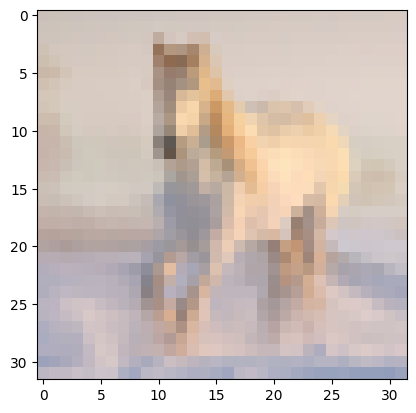

In [43]:
plt.imshow(thearray)

In [38]:
model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[5.6668416e-02, 5.3142943e-05, 7.5762615e-02, 3.8548797e-01,
        5.6166455e-02, 4.0396649e-01, 8.9489827e-03, 4.8427596e-03,
        4.3547628e-03, 3.7483559e-03]], dtype=float32)

In [39]:
 np.argmax(model.predict(img_array), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([5])

In [ ]:
# prompt: what are the 10 classes names from 0-9 in cifar 10

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
class_names